### Curse Of Dimensionality

* The Curse of Dimensionality is termed by mathematician R. Bellman in his book “Dynamic Programming” in 1957. According to him, the curse of dimensionality is the problem caused by the exponential increase in volume associated with adding extra dimensions to Euclidean space.  

* The curse of dimensionality basically means that the error increases with the increase in the number of features. It refers to the fact that algorithms are harder to design in high dimensions and often have a running time exponential in the dimensions. A higher number of dimensions theoretically allow more information to be stored, but practically it rarely helps due to the higher possibility of noise and redundancy in the real-world data.

* Gathering a huge number of data may lead to the dimensionality problem where <b>highly noisy dimensions with fewer pieces of information and without significant benefit can be obtained due to the large data</b>. The exploding nature of spatial volume is at the forefront is the reason for the curse of dimensionality.

&nbsp;

### About Linear Transformation

* We can manipulate a vector by multiplying it with a matrix. The matrix acts as a function that operates on an input vector to produce a vector output. Specifically, matrix multiplications of vectors are linear transformations that transform the input vector into the output vector.

* We can define a transformation T like this: T( 𝑣⃗) = A 𝑣⃗

* Linear transformation do the transformation on input data's high variance direction, where eigen vectors are the vectors in same high variance direction where linear transformation happens. That's Eigen vectors are used for linear transformation on input data.

![title](images/Linear_Transformation.png)

![title](images/Linear_Transformation_1.png)

&nbsp;

&nbsp;

### About Covariance Matrix

![title](images/covariance_1.png)
![title](images/covariance_2.png)
* A two dimensional data variance,covariance explanation can be achieved by the 2x2 covariance matrix.
![title](images/Covariance_Matrix.png)
* We can see in 1st subplot plot 5 show variance spread of x axis data points and 6 show variance spread of y axis data points. Where both 4 shows (x,y) & (y,x) combinedly change together spread.
* Hence, by using Covariance matrix, we get to know data's variance & covariance information. From this we decompose covariance matrix into (Eigen vectors & Eigen values)  i.e., Eigen decomposition. We use top Eigen vectors and Eigen values as projection matrix & then do linear transformation by projection matrix * input data = output data(i.e, as a result we get less dimesions data, those dimensions have high variance out of all dimensions. because we use high variance direction(i.e., eigen vectors) also known as top axis with high variance) 

&nbsp;

&nbsp;

### What is PCA ??

##### Principal component analysis (PCA) : Eigen vectors analysis
* Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.
* PCA tries to find the directions of maximum variance (direction of orthogonal axes / principal components) in data and projects it onto a new subspace with lower dimension than the original one.

![title](images/PCA_1.png)
![title](images/PCA_2.png)

* The eigendecomposition is a way of expressing a covariance matrix in terms of its eigenvectors and eigenvalues.
* Eigen Vectors are the unit vectors(just to show the direction) which tells the direction of the maximum variance of data. & Eigen Variance tells us how much variance we have in that direction(of eigen vector).

&nbsp;

&nbsp;

### Importing Libraries

In [15]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

&nbsp;

&nbsp;

### Sample Data

In [5]:
hair_color = [.2,.2,.2,.2,.2,.2,.2,.2,.2,.2,.2,.2]
heights = [0.3,.8,.9,.8,.6,.9,.6,.6,.7,.5,.6,.8]

&nbsp;

&nbsp;

### PCA(From Scratch)

In [9]:
X = np.vstack((hair_color, heights)).T
print("This is matrix format with two columns :\n")
print(X)

This is matrix format with two columns :

[[0.2 0.3]
 [0.2 0.8]
 [0.2 0.9]
 [0.2 0.8]
 [0.2 0.6]
 [0.2 0.9]
 [0.2 0.6]
 [0.2 0.6]
 [0.2 0.7]
 [0.2 0.5]
 [0.2 0.6]
 [0.2 0.8]]


In [13]:
#Covariance
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

#Covariance matrix
def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])

print(X.T,'\n')

C = cov_mat(X.T)

print("Covariance Matrix :\n")
print(C)

[[0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.3 0.8 0.9 0.8 0.6 0.9 0.6 0.6 0.7 0.5 0.6 0.8]] 

Covariance Matrix :

[[ 8.40405794e-34 -2.10101448e-33]
 [-2.10101448e-33  3.11363636e-02]]


In [30]:
eig_vals, eig_vecs = np.linalg.eig(C) 
# This numpy function finding Eigen vectors and Eigen Values(We can do this manually but some conditions to be satisfied, refer notes)

print('Eigenvectors : 1st column is one eigen vector \ 2nd column is second eigen vector \n%s' %eig_vecs)
print('\nEigenvalues : 1st value is one eigen value \ 2nd value is second eigen value \n%s' %eig_vals,'\n\n')

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Eig_pairs :')
print(eig_pairs,'\n')

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order :')
for i in eig_pairs:
    print(i[0])
    
matrix_w = np.hstack((eig_pairs[0][1].reshape(2,1),
                      eig_pairs[1][1].reshape(2,1)))

print('\n\nTransformation Matrix W \ Projection Matrix \ Eigen Vectors of Covariance Matrix, \
      \nwhich linearly transforms input data into datas high variance direction:\
      \n\n1st column is highest eigen vector \ 2nd column is second highest eigen vector\n\n',
      matrix_w)

Eigenvectors : 1st column is one eigen vector \ 2nd column is second eigen vector 
[[ 1.00000000e+00 -6.74778375e-32]
 [ 0.00000000e+00  1.00000000e+00]]

Eigenvalues : 1st value is one eigen value \ 2nd value is second eigen value 
[8.40405794e-34 3.11363636e-02] 


Eig_pairs :
[(0.03113636363636364, array([-6.74778375e-32,  1.00000000e+00])), (8.404057939144301e-34, array([1., 0.]))] 

Eigenvalues in descending order :
0.03113636363636364
8.404057939144301e-34


Transformation Matrix W \ Projection Matrix \ Eigen Vectors of Covariance Matrix,       
which linearly transforms input data into datas high variance direction:      

1st column is highest eigen vector \ 2nd column is second highest eigen vector

 [[-6.74778375e-32  1.00000000e+00]
 [ 1.00000000e+00  0.00000000e+00]]


##### Key Note :
* <span style='background:yellow'>Eigen vectors are the one of the vectors of covariance matrix, where covariance matrix has all input data points like its vectors in coordinate system, & Eigen vectors of covariance matrix should be derived in such a way that, it should obey below condition.</span>
* <span style='background:yellow'>Covariance Matrix * Eigen vectors = Eigen Values * Eigen vectors</span>
* i.e., Multiplying Eigen vectors with Covariance Matrix(variance & covariance data) = Eigen vectors(direction of high variance data dimension) multiplying with Eigen values(value of variance in the direction of eigen vector). 
* Like this Eigen vectors & Eigen values explains the covariance matrix(data variance & covariance information).

&nbsp;

#### Proof of deriving Eigen Vectors, obeying condition(T * 𝑣⃗ = A * 𝑣⃗)
* T = Covariance Matrix
* 𝑣⃗ = Eigen vectors
* A = Eigen values

In [49]:
C.dot(matrix_w[0])# 1st eigen vector multiple with Covariance matrix of input data

array([-2.10101448e-33,  3.11363636e-02])

In [51]:
eig_vals[1]*matrix_w[0] # 1st eigen vector multiple with 1st eigen value

array([-2.10101448e-33,  3.11363636e-02])

In [53]:
C.dot(matrix_w[1])# 2nd eigen vector multiple with Covariance matrix of input data

array([ 8.40405794e-34, -2.10101448e-33])

In [61]:
eig_vals[0]*matrix_w[1] # 2nd eigen vector multiple with 2nd eigen value

array([8.40405794e-34, 0.00000000e+00])

In [65]:
print('%.20f'%-2.10101448e-33)
print('%.20f'%0.00000000e+00)

-0.00000000000000000000
0.00000000000000000000


##### Key Note :
* Hence eigen vectors are obeying mandotary condition.

&nbsp;

#### Linear\Orthogonal Transformation : Using Eigen Vectors

In [46]:
Y = X.dot(matrix_w)

&nbsp;

#### Visualizing Orthogonal Transformation

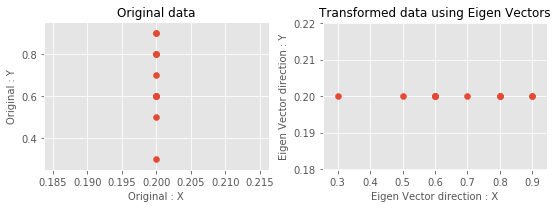

In [47]:
# plt.style.available

plt.style.use('ggplot')
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(8,3))

axes[0].scatter(X[:, 0], X[:, 1])
axes[0].set_title('Original data',size=12)
axes[0].set_xlabel('Original : X',size=10)
axes[0].set_ylabel('Original : Y',size=10)

axes[1].scatter(Y[:, 0], Y[:, 1])
axes[1].set_title('Transformed data using Eigen Vectors',size=12)
axes[1].set_xlabel('Eigen Vector direction : X',size=10)
axes[1].set_ylabel('Eigen Vector direction : Y',size=10)

plt.tight_layout()
plt.show()

&nbsp;

&nbsp;

### PCA(Sklearn)

In [69]:
pca = PCA()

# K = pca.fit_transform(X)
model = pca.fit(X)
model

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [70]:
model.explained_variance_

array([3.11363636e-02, 8.40405794e-34])

In [71]:
model.explained_variance_ratio_

array([1.0000000e+00, 2.6991135e-32])

In [72]:
model.n_components_

2

In [77]:
model.n_features_

2

In [81]:
model.components_

array([[ 6.23333562e-32, -1.00000000e+00],
       [-1.00000000e+00, -6.23333562e-32]])

In [87]:
K = model.transform(X)#Performing orthogonal transformation on input data into its top high variance dimensions.

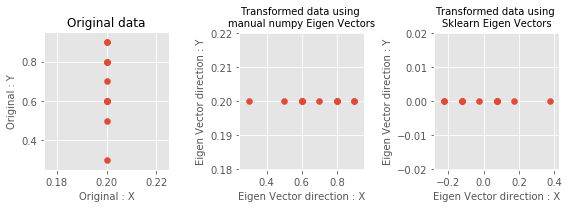

In [85]:
# plt.style.available

plt.style.use('ggplot')
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(8,3))

axes[0].scatter(X[:, 0], X[:, 1])
axes[0].set_title('Original data',size=12)
axes[0].set_xlabel('Original : X',size=10)
axes[0].set_ylabel('Original : Y',size=10)

axes[1].scatter(Y[:, 0], Y[:, 1])
axes[1].set_title('Transformed data using \nmanual numpy Eigen Vectors',size=10)
axes[1].set_xlabel('Eigen Vector direction : X',size=10)
axes[1].set_ylabel('Eigen Vector direction : Y',size=10)

axes[2].scatter(K[:, 0], K[:, 1])
axes[2].set_title('Transformed data using \nSklearn Eigen Vectors',size=10)
axes[2].set_xlabel('Eigen Vector direction : X',size=10)
axes[2].set_ylabel('Eigen Vector direction : Y',size=10)

plt.tight_layout()
plt.show()

#### Key Note :
* If we notice Sklearn:PCA:Eigen vectors and Manual:PCA:Eigen vectors done same transformations. Eigen direction are exactly same in variance but got upside down axes in finding variance, however which is same in finding variance of input data, that's sklearn got one point at last and manual got that one point as at intial, which is ok. 

&nbsp;

&nbsp;

#### Advantages of Principal Component Analysis :

1. <b>Removes Correlated Features:</b> In a real world scenario, this is very common that you get thousands of features in your dataset. You cannot run your algorithm on all the features as it will reduce the performance of your algorithm and it will not be easy to visualize that many features in any kind of graph. So, you MUST reduce the number of features in your dataset. 

2. <b>Improves Algorithm Performance:</b> With so many features, the performance of your algorithm will drastically degrade. PCA is a very common way to speed up your Machine Learning algorithm by getting rid of correlated variables which don't contribute in any decision making. The training time of the algorithms reduces significantly with less number of features.

3. <b>Reduces Overfitting:</b> Overfitting mainly occurs when there are too many variables in the dataset. So, PCA helps in overcoming the overfitting issue by reducing the number of features.

4. <b>Improves Visualization:</b> It is very hard to visualize and understand the data in high dimensions. PCA transforms a high dimensional data to low dimensional data (2 dimension) so that it can be visualized easily. 

#### Disadvantages of Principal Component Analysis :

1. <b>Independent variables become less interpretable:</b> After implementing PCA on the dataset, your original features will turn into Principal Components. Principal Components are the linear combination of your original features. Principal Components are not as readable and interpretable as original features.

2. <b>Data standardization is must before PCA:</b> You must standardize your data before implementing PCA, otherwise PCA will not be able to find the optimal Principal Components. 

3. <b>Information Loss:</b> Although Principal Components try to cover maximum variance among the features in a dataset, if we don't select the number of Principal Components with care, it may miss some information as compared to the original list of features.